In [1]:
%matplotlib inline
import scipy.stats as sct
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from ipywidgets import interact, fixed
import glob
import pickle
from pprint import pprint
import os
from PIL import Image
from tqdm import tqdm

In [2]:
%%html
<style>
div.input {
    display:none;
}
</style>

In [3]:
def loadfile(getfilename):
    filename = glob.glob(getfilename)[0]
    with open(filename, 'rb') as f:
        variable = pickle.load(f)
    return variable

# 異常の更新時の係数を数式通りに実装
# rejectなし / 全ての異常を学習
## 10回平均をとって１σ，２σ，３σ，４σ，５σでaccuracy
- １〜５σで10回づつ行い，学習した枚数ごとに平均を取ったもの
- carpetとgridのグラフの縦軸のレンジは他のものと違う
- rejectしていないため，AUCはσの係数では変わらない

In [4]:
def plot_ac(ms, auclog, color=None):
    plt.plot(auclog, label="{0}σ, Max={1:.3f}".format(ms, max(auclog)), color=color)

In [5]:
# dirname = 'output4all_reject_10_sigma_norm/'
# dirname = 'output4all/'
dirname = 'output4all_cgn/'
def show_eachresult_reject(classn, n_layer, threshold, mul_sigs, ONE=False):
    plt.rcParams['figure.figsize'] = (15.0, 5.0)
    plt.figure()
    
    
    plt.subplot(1, 2, 1)
    plt.title("AUC with Reject")
    plt.xlabel("Number of Defective Images")
    plt.ylabel("AUC with Reject")
    plt.ylim(0.8, 1)
    if classn=='carpet':
        plt.ylim(0.7, 0.9)
    elif classn=='grid':
        plt.ylim(0.4, 0.6)
    for ms in mul_sigs:
        dirname1 = dirname + classn + '._mbn_1.0.{0}.*.{1}.{2}'.format(n_layer, threshold, ms)
        auclogs = glob.glob(os.path.join(dirname1, "AUClog*.pcl"))
        if len(auclogs) == 0:
            dirname1 = dirname + classn + '._mbn_1.0.{0}.*.{1}*'.format(n_layer, threshold)
            auclogs = glob.glob(os.path.join(dirname1, "AUClog*.pcl"))
        auclog1 = []
        for aul in auclogs:
            auclog1.append(loadfile(aul))
            avg_auclog1 = []
            for itm in zip(*auclog1):
                avg_auclog1.append(np.mean(itm))
        if ONE:
            avg_auclog1 = auclog1[0]
        plot_ac(ms, avg_auclog1)
    plt.legend()
    
    
    plt.subplot(1, 2, 2)
    plt.title("Accuracy with Reject [%]")
    plt.xlabel("Number of Defective Images")
    plt.ylabel("Accuracy with Reject [%]")
    plt.ylim(0, 1)
    for ms in mul_sigs:
        dirname1 = dirname + classn + '._mbn_1.0.{0}.*.{1}.{2}'.format(n_layer, threshold, ms)
        acclogs = glob.glob(os.path.join(dirname1, "ACClog*.pcl"))
        if len(acclogs) == 0:
            dirname1 = dirname + classn + '._mbn_1.0.{0}.*.{1}*'.format(n_layer, threshold)
            acclogs = glob.glob(os.path.join(dirname1, "ACClog*.pcl"))
        acclog1 = []
        for acl in acclogs:
            acclog1.append(loadfile(acl))
            avg_acclog1 = []
            for itm in zip(*acclog1):
                avg_acclog1.append(np.mean(itm))
            if ONE:
                avg_acclog1 = acclog1[0]
        plot_ac(ms, avg_acclog1)
    plt.legend()

bottle


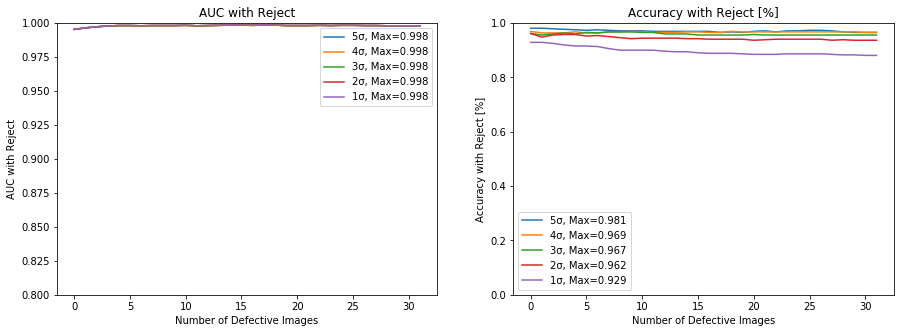

cable


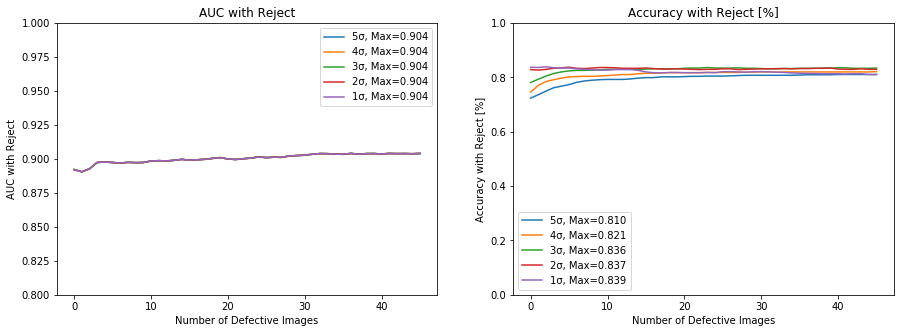

capsule


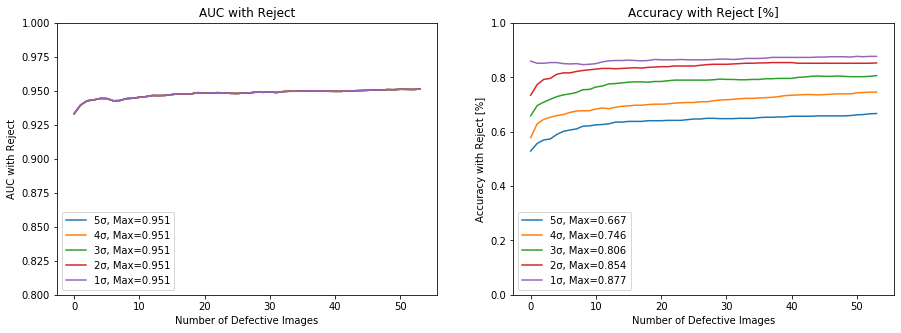

carpet


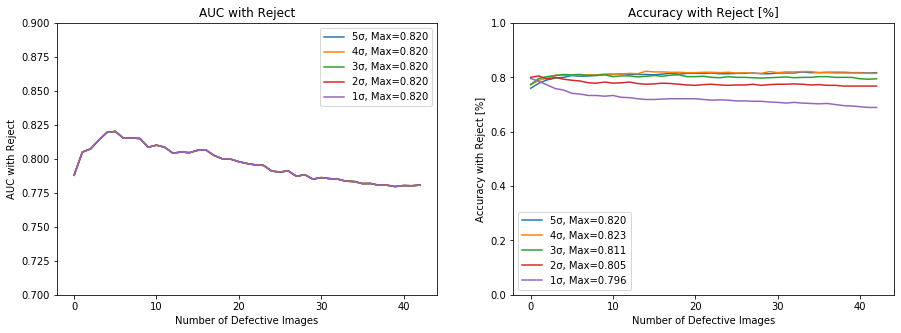

grid


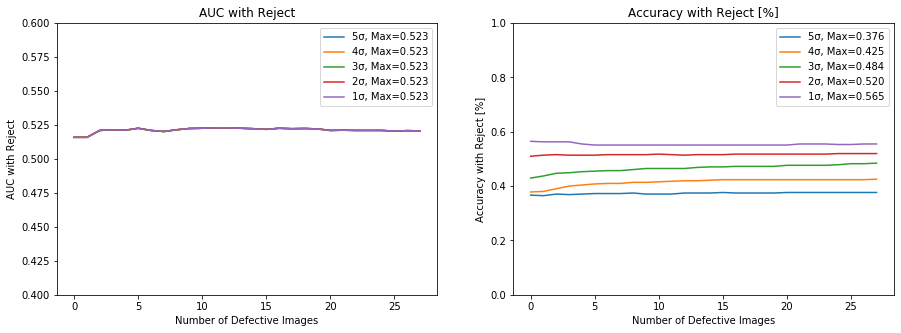

hazelnut


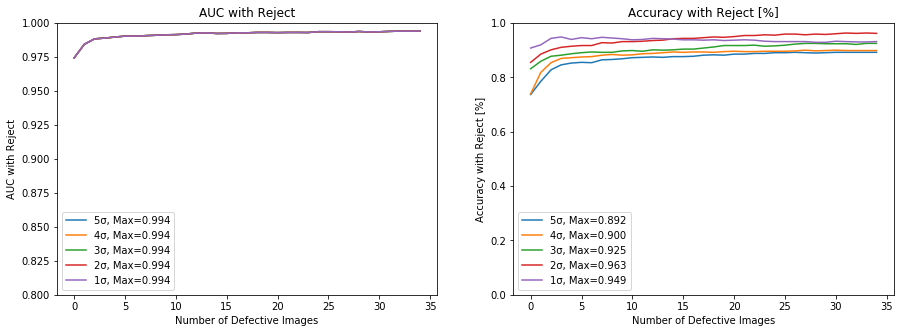

leather


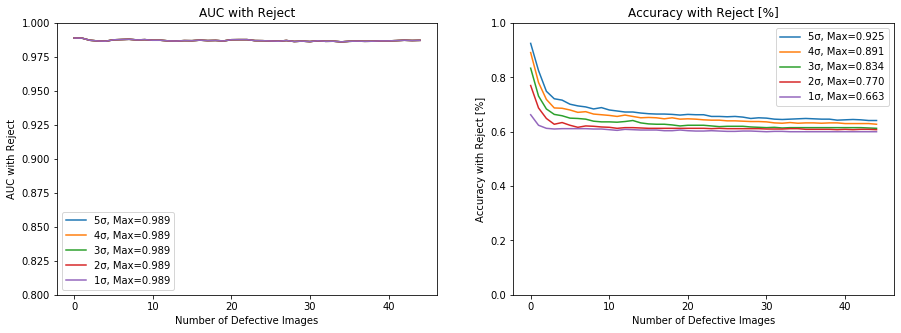

metal_nut


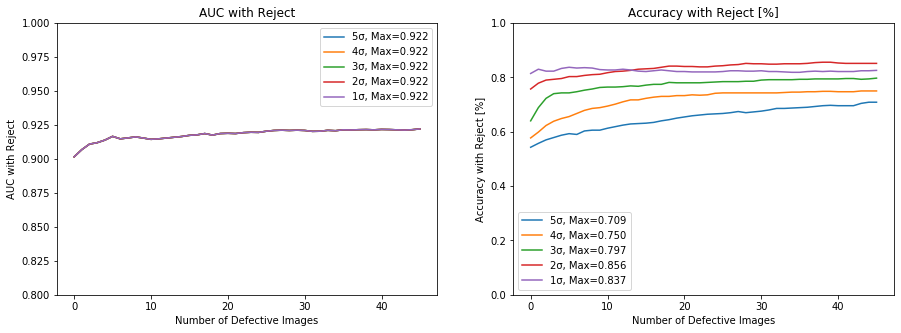

pill


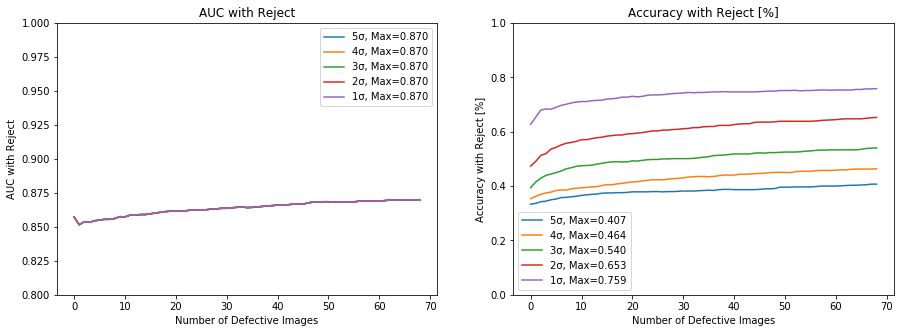

screw


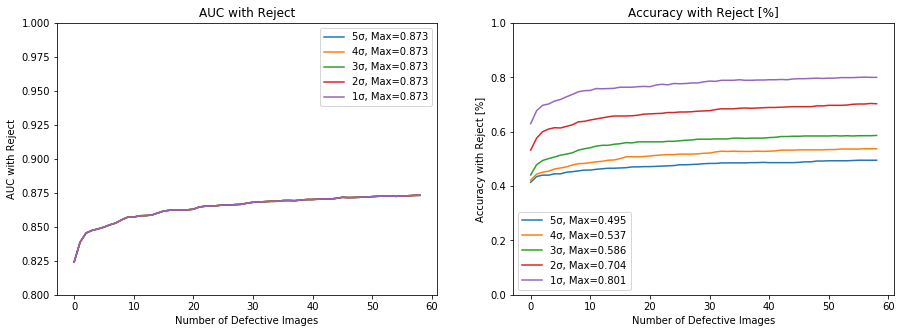

tile


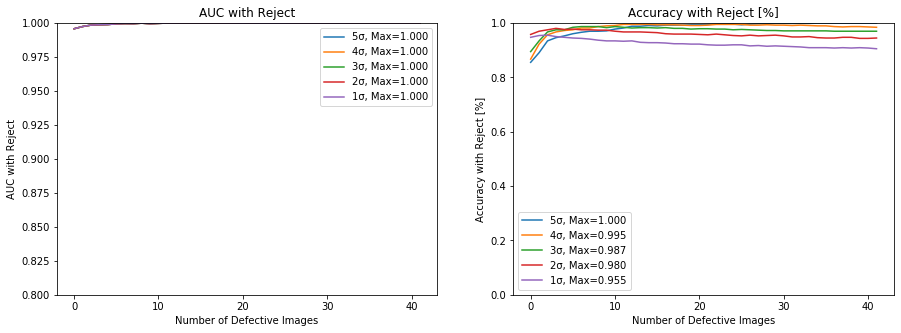

toothbrush


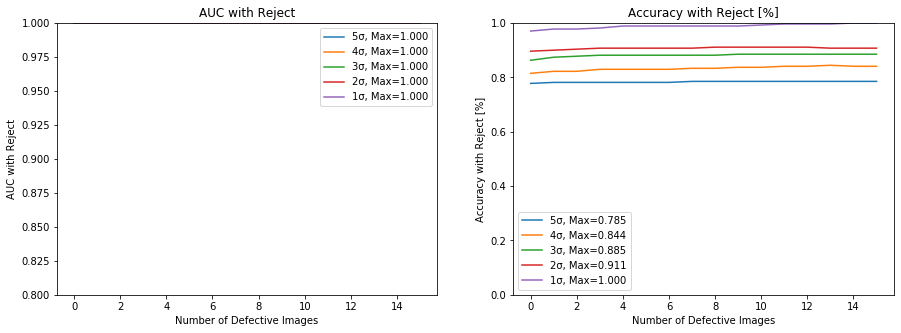

transistor


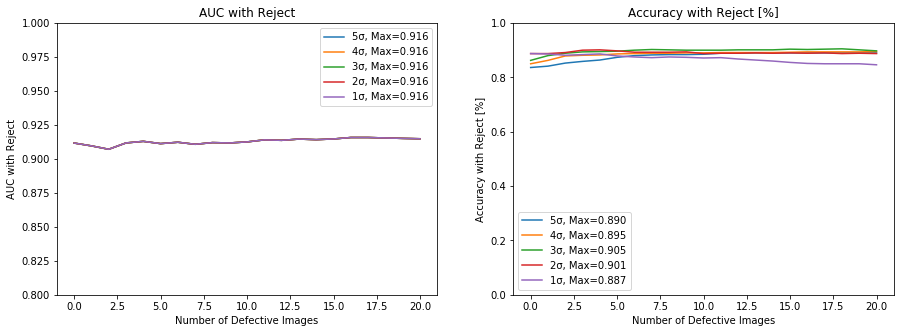

wood


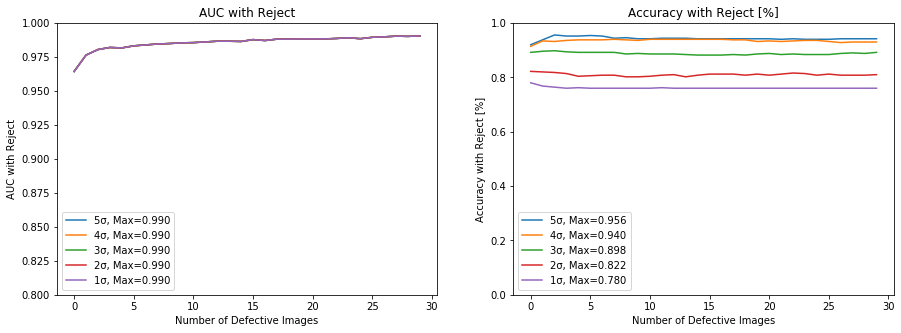

zipper


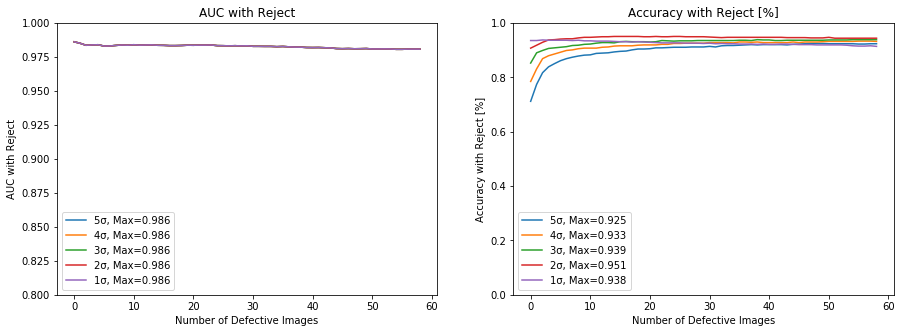

In [6]:
logdirs0 = sorted(glob.glob(dirname + '/*_mbn_*'))
classn = sorted(list(set([d.split('.')[0].split('/')[1] for d in logdirs0])))
# print(classn)
# interact(show_eachresult_reject, classn=classn, n_layer=n_layers, threshold=thresholds)
for c in classn:
    print(c)
    #show_eachresult_reject(classn=c, n_layer=19, threshold=0.999, mul_sigs=list(reversed([0])), ONE=False)
    show_eachresult_reject(classn=c, n_layer=19, threshold=0.999, mul_sigs=list(reversed([1, 2, 3, 4, 5])), ONE=False)
    #show_eachresult_reject(classn=c, n_layer=19, threshold=0.999, mul_sigs=list(reversed([1, 2, 3, 4, 5])), ONE=True)
    plt.show()

## ダイジェスト論文用表
## AEに合わせて５回平均

In [7]:
# dirname = 'output4all_reject_10_sigma_norm/'
# dirname = 'output4all/'
dirname = 'output4all_cgn/'
def table_eachresult_reject(classn, n_layer, threshold, mul_sigs, ONE=False):
    for ms in mul_sigs:
        dirname1 = dirname + classn + '._mbn_1.0.{0}.*.{1}.{2}'.format(n_layer, threshold, ms)
        auclogs = glob.glob(os.path.join(dirname1, "AUClog*.pcl"))
        if len(auclogs) == 0:
            dirname1 = dirname + classn + '._mbn_1.0.{0}.*.{1}*'.format(n_layer, threshold)
            auclogs = glob.glob(os.path.join(dirname1, "AUClog*.pcl"))
        auclog1 = []
        # print("len", len(auclogs))
        for aul in auclogs[:5]: ## 5回平均
            auclog1.append(loadfile(aul))
            avg_auclog1 = []
            for itm in zip(*auclog1): # 時系列ごとに平均 / zipが最小の長さに合わせる
                avg_auclog1.append(np.mean(itm))
        if ONE:
            avg_auclog1 = auclog1[0]
    # 最後のmul_sigの時の結果を表示 (no reject)
    # print("{:.2f}".format(avg_auclog1[0]), end=', ') # 正常データのみ
    for i in range(min(4, (len(avg_auclog1)//5)+1)):
        # print((i*5)+1, end=', ')
        print("{:.2f}".format(avg_auclog1[(i*5)]), end=', ')
        # print(i*5, end=', ')
    print('')

In [8]:
logdirs0 = sorted(glob.glob(dirname + '/*_mbn_*'))
classn = sorted(list(set([d.split('.')[0].split('/')[1] for d in logdirs0])))
for c in classn:
    print("{:<15}".format(c), end=', ')
    table_eachresult_reject(classn=c, n_layer=19, threshold=0.999, mul_sigs=list(reversed([1, 2, 3, 4, 5])), ONE=False)

bottle         , 1.00, 1.00, 1.00, 1.00, 
cable          , 0.89, 0.90, 0.90, 0.90, 
capsule        , 0.93, 0.95, 0.95, 0.95, 
carpet         , 0.79, 0.83, 0.82, 0.81, 
grid           , 0.52, 0.54, 0.54, 0.54, 
hazelnut       , 0.97, 0.99, 0.99, 0.99, 
leather        , 0.99, 0.99, 0.99, 0.99, 
metal_nut      , 0.90, 0.91, 0.91, 0.91, 
pill           , 0.86, 0.85, 0.86, 0.86, 
screw          , 0.82, 0.85, 0.86, 0.87, 
tile           , 1.00, 1.00, 1.00, 1.00, 
toothbrush     , 1.00, 1.00, 1.00, 1.00, 
transistor     , 0.91, 0.91, 0.91, 0.92, 
wood           , 0.96, 0.98, 0.99, 0.99, 
zipper         , 0.99, 0.98, 0.99, 0.98, 
